**Visualisasi dan Analisis Numerik Turunan Dengan Metode Heun**

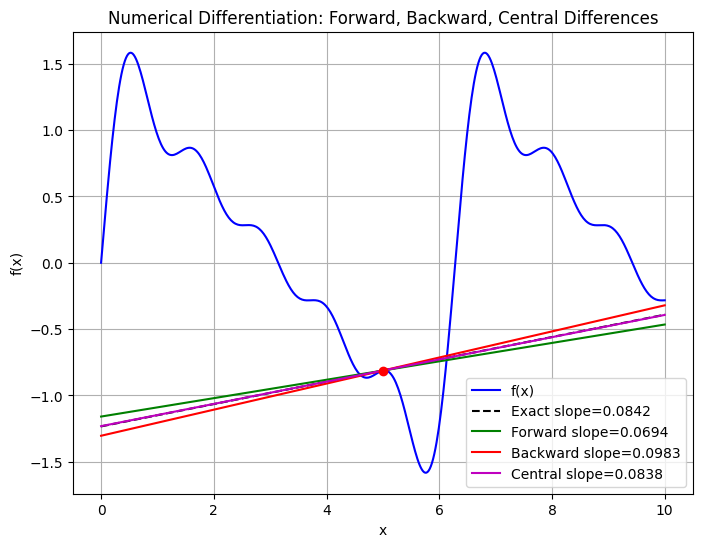

In [72]:
#Nama : Desi Nofitasari
#NPM  : 24083010058
#Kelas: Analisis Numerik A
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi dan turunannya
def f(x):
    return np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

def f_prime_exact(x):
    return np.cos(x) + np.cos(2*x) + np.cos(3*x) + np.cos(4*x) + np.cos(5*x)

# Parameter
x0 = 5.0
h = 0.01

# Nilai fungsi
f_x0 = f(x0)

# Rumus Turunan
forward = (f(x0 + h) - f(x0)) / h
backward = (f(x0) - f(x0 - h)) / h
central = (f(x0 + h) - f(x0 - h)) / (2*h)
exact = f_prime_exact(x0)

# Plot fungsi
x = np.linspace(0, 10, 500)
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, 'b', label='f(x)')

# Titik evaluasi
plt.scatter(x0, f_x0, color='red', zorder=5)

# Garis turunan exact
plt.plot(x, f_x0 + exact*(x-x0), 'k--', label=f'Exact slope={exact:.4f}')

# Garis forward, backward, central
plt.plot(x, f_x0 + forward*(x-x0), 'g-', label=f'Forward slope={forward:.4f}')
plt.plot(x, f_x0 + backward*(x-x0), 'r-', label=f'Backward slope={backward:.4f}')
plt.plot(x, f_x0 + central*(x-x0), 'm-', label=f'Central slope={central:.4f}')

plt.title("Numerical Differentiation: Forward, Backward, Central Differences")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Mencari turunan dengan analisis numerik perlu menggunakan perbandingan dengan exact atau aproksimasi paling tinggi dari nilai integral sebenarnya (rumus Gaussian quadrature). Dipilih nilai x=5 karena nilai tengan dari interval 0-10 agar hasil lebih akurat dan tidak dekat dengan batas kanan maupun kiri. berikut beberapa cara analisis numerik untuk hitung integral:
1. Exact : nilai turunan yang dihitung dengan rumus asli turunan dari soal diatas maka turunannya yaitu f'(x)=cos(x)+cos(2*x)+cos(3*x)+cos(4*x)+cos(5*x) lalu masukkan nilai x=5 maka akan didapatkan hasil 0,0842 sebagai pembanding hasil.
2. Forward Diff (perhitungan maju) : dihitung menggunakan rumus (f(x + h) - f(x)) / h dengan h diantara 0.1 - 0.00001 semakin kecil maka akurasi akan semakin tinggi. jadi pada garis yang berwarna hijau ,turunan dengan x=5 maka bernilai 0.0694 yang menunjukkan beda 0.0148 dengan exact.
3. Backward Diff (perhitungan mundur): dihitung dengan rumus (f(x) - f(x - h)) / h ,dari hasil perhitungan backward (garis merah) dengan x=5 didapatkan turunan f(x) yaitu 0.0983 dengan beda 0.0141 dari exact.
4. Central diff (perhitungan pusat) : dihitung dengan rumus (f(x0 + h) - f(x0 - h)) / (2*h) ,dari hasil perhitungan central (garis ungu) dengan x=5 didapatkan turunan f(x) yaitu 0.0838 dengan beda 0.0004 dari exact.

**Kesimpulan**

Metode analisis numerik heun yang memiliki akurasi paling tinggi yaitu Central diff dengan beda akurasi 0,0004 dari nilai exact jadi metode ini paling cocok untuk analisis numerik dengan nilai f(x) yang rumit dan tidak bisa diselesaikan dengan turunan sederhana. Tujuan garis-garis berwarna tersebut mengetahui bagaimana metode-metode tersebut dapat mendekati nilai turunan sebenarnya,nilai h juga sangat berpengaruh untuk hasil turunan maka semakin kecil ketelitian seperti 0,001 maka garis-garis tersebut akan semakin berhimpit.

**Visualisasi dan Analisis Metode Trapesium dan Simpson**

Hasil integral Trapesium = 2.0791658881929473
Hasil integral Simpson = 2.209500912085397
Hasil integral eksak = 2.186608062460288


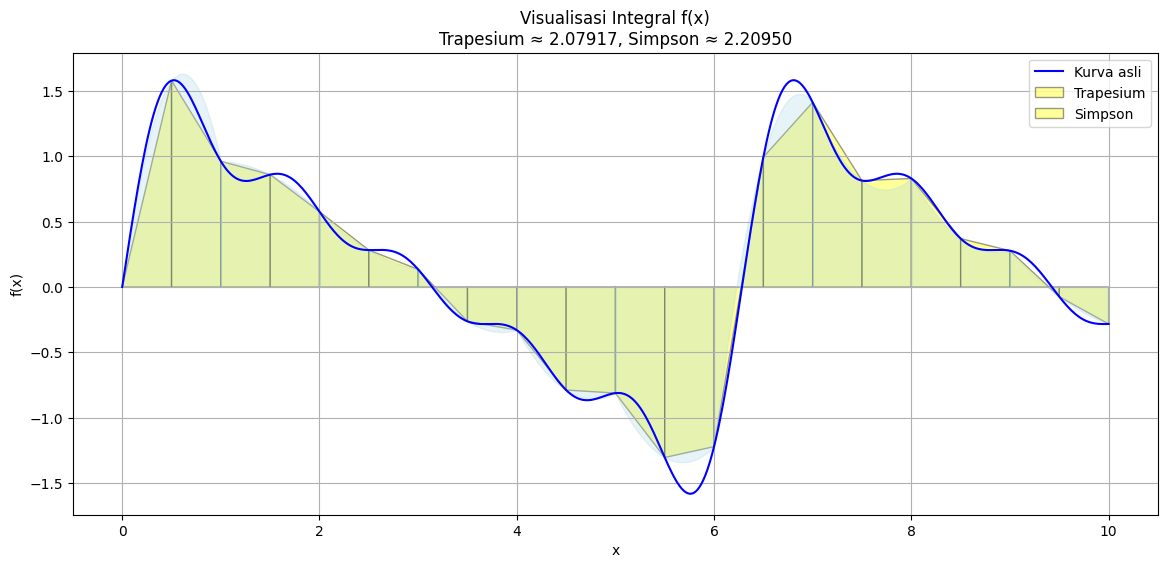

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi dan interval
a, b, n = 0, 10, 20
x = np.linspace(a, b, n+1)
f = np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

# Kurva halus untuk plot
x_fine = np.linspace(a, b, 500)
f_fine = np.sin(x_fine) + 0.5*np.sin(2*x_fine) + (1/3)*np.sin(3*x_fine) + (1/4)*np.sin(4*x_fine) + (1/5)*np.sin(5*x_fine)

h = (b - a) / n

# Trapesium
integral_trap = (h/2) * (f[0] + 2*np.sum(f[1:-1]) + f[-1])

# Simpson
if n % 2 == 0:
    integral_simp = (h/3) * (f[0] + 4*np.sum(f[1:-1:2]) + 2*np.sum(f[2:-2:2]) + f[-1])
else:
    integral_simp = None

# Integral eksak (numerik dengan quad)
f_real = lambda x: np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)
integral_exact, _ = quad(f_real, a, b)

print("Hasil integral Trapesium =", integral_trap)
print("Hasil integral Simpson =", integral_simp)
print("Hasil integral eksak =", integral_exact)

# Plot
plt.figure(figsize=(14,6))
plt.plot(x_fine, f_fine, 'b', label='Kurva asli f(x)')

# Trapesium
for i in range(n):
    xi, xj = x[i], x[i+1]
    yi, yj = f[i], f[i+1]
    plt.fill([xi, xi, xj, xj], [0, yi, yj, 0], color='yellow', alpha=0.4, edgecolor='k')

# Simpson (parabola antar 3 titik)
for i in range(0, n, 2):
    if i+2 <= n:
        xs = np.linspace(x[i], x[i+2], 50)  # 50 titik untuk parabola
        # koefisien interpolasi parabola (Lagrange 2nd degree)
        xi0, xi1, xi2 = x[i], x[i+1], x[i+2]
        yi0, yi1, yi2 = f[i], f[i+1], f[i+2]
        ys = yi0*((xs - xi1)*(xs - xi2))/((xi0 - xi1)*(xi0 - xi2)) + \
             yi1*((xs - xi0)*(xs - xi2))/((xi1 - xi0)*(xi1 - xi2)) + \
             yi2*((xs - xi0)*(xs - xi1))/((xi2 - xi0)*(xi2 - xi1))
        plt.fill_between(xs, 0, ys, color='lightblue', alpha=0.3)

plt.title(f"Visualisasi Integral f(x)\nTrapesium ≈ {integral_trap:.5f}, Simpson ≈ {integral_simp:.5f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(['Kurva asli', 'Trapesium', 'Simpson'])
plt.grid(True)
plt.show()

Kode dan Gambar visualisasi di atas adalah penerapan perhitungan integral dengan metode Trapesium dan Simpson.
1. Kurva asli f(x) ditunjukkan dengan garis biru yang diperoleh dari fungsi np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x). Gelombang berosilasi karena gabungan dari sinus dengan frekuensi berbeda. Nilai exact didapatkan dari perhitungan sederhana aturan pangkat diperoleh 2.18069,nilai ini sebagai acuan paling akurat dengan metode lain.
2. Metode Trapesium
interval yang dipakai yaitu dari 0-10 dengan 20 subinterval. luas dihitung dengan rumus 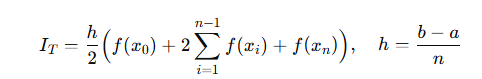
dengan iterasi penjumlahan di tiap luas trapesium di bawah kurva. Hasil dari metode ini yaitu 2.07917 dengan beda 0,10744 dari exact. Dari grafik tersebut metode trapesium digambarkan dengan potongan-potongan trapesium berwarna kuning,arsiran terlihat lebih kasar karena hanya menghubungkan satu titi dengan titik lain dengan garis lurus.
3. Metode Simpson
Metode simpson hanya bisa dipakai ketika n=genap karena pada metode ini menghubungkan setiap 2 subinterval yang akan dihampiri oleh sebuah parabola,dalam grafik tersebut area bawah kurva metode simpson diwarnai lightblue. rumus secara umum yaitu 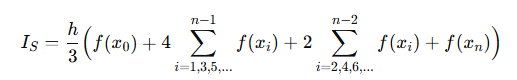
Dalam rumus tersebut indeks genap(2,4,6,..) dikalikan dengan 2 dan indeks ganjil (1,3,5...) dikalikan dengan 4. Hasil Integral metode simpson yaitu 2.20950 dengan selisih error 0.0229. Area dibawah kurva digambarkan lebih halus karena menggunakan pendekatan potongan parabola.

Dapat disimpulkan metode simpson lebih akurat dibandingkan dengan metode trapesium karena ketika di uji dengan n=20 hasil beda simpson dengan exact lebih kecil,hasil akan bisa lebih maksimal ketika n atau subinterval lebih besar seperti 500 atau 1000.


**Visualisasi dan Analisis Numerik Area Positif dan Negatif Sumbu y**

Simpson total   = 2.2095009120853106
Simpson positif = 4.5822514945139865
Simpson negatif = -2.372750582428676
Integral exact  = 2.186608062460288


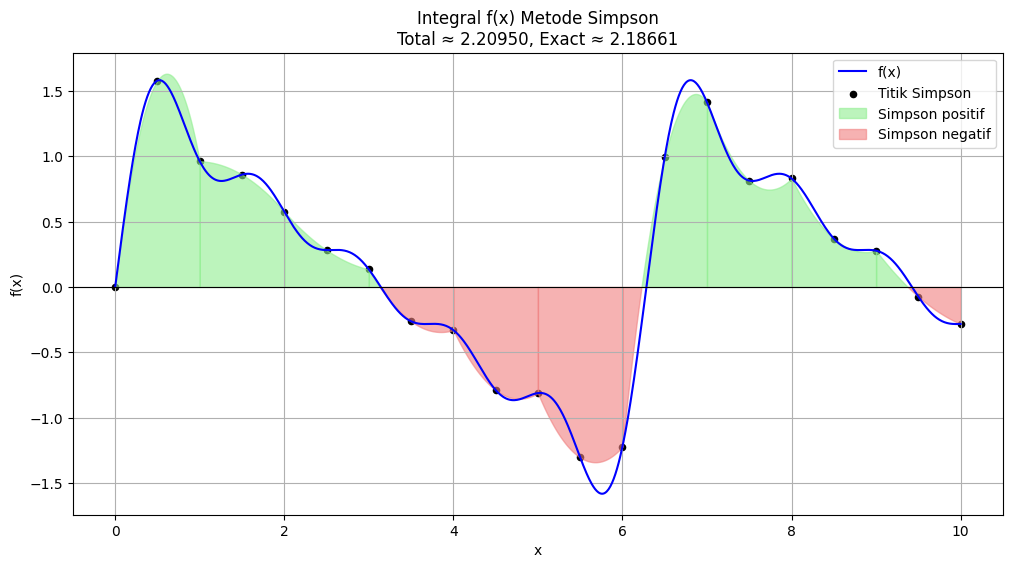

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# fungsi target
def f_fun(x):
    return np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

# interval & titik Simpson
a, b, n = 0, 10, 20
x = np.linspace(a, b, n+1)
f = f_fun(x)

# integral eksak
integral_exact, _ = quad(f_fun, a, b)

# fungsi hitung parabola
def simpson_segment(xi, xm, xj, yi, ym, yj):
    A = np.array([[xi**2, xi, 1],
                  [xm**2, xm, 1],
                  [xj**2, xj, 1]], float)
    Y = np.array([yi, ym, yj], float)
    a_coef, b_coef, c_coef = np.linalg.solve(A, Y)

    # antiturunan
    def F(xv): return a_coef/3*xv**3 + b_coef/2*xv**2 + c_coef*xv
    return a_coef, b_coef, c_coef, F

# loop integral & pemisahan area
I_total, I_pos, I_neg = 0, 0, 0
for i in range(0, n, 2):
    xi, xm, xj = x[i], x[i+1], x[i+2]
    yi, ym, yj = f[i], f[i+1], f[i+2]
    a_coef, b_coef, c_coef, F = simpson_segment(xi, xm, xj, yi, ym, yj)

    # cari akar parabola dalam [xi, xj]
    roots = [r.real for r in np.roots([a_coef, b_coef, c_coef]) if np.isreal(r) and xi < r.real < xj]
    pts = [xi] + sorted(roots) + [xj]

    # hitung per bagian (pisahkan + dan -)
    for s, e in zip(pts[:-1], pts[1:]):
        area = F(e) - F(s)
        mid = 0.5*(s+e)
        val_mid = a_coef*mid**2 + b_coef*mid + c_coef
        if val_mid >= 0: I_pos += area
        else: I_neg += area
        I_total += area

print("Simpson total   =", I_total)
print("Simpson positif =", I_pos)
print("Simpson negatif =", I_neg)
print("Integral exact  =", integral_exact)

# plot
x_fine = np.linspace(a, b, 1000)
plt.figure(figsize=(12,6))
plt.plot(x_fine, f_fun(x_fine), 'b', label='f(x)')
plt.scatter(x, f, color='k', s=20, label='Titik Simpson')
plt.axhline(0, color='k', linewidth=0.8)

first_pos, first_neg = True, True
for i in range(0, n, 2):
    xi, xm, xj = x[i], x[i+1], x[i+2]
    yi, ym, yj = f[i], f[i+1], f[i+2]
    a_coef, b_coef, c_coef, _ = simpson_segment(xi, xm, xj, yi, ym, yj)

    xs = np.linspace(xi, xj, 200)
    ys = a_coef*xs**2 + b_coef*xs + c_coef

    if first_pos:
        plt.fill_between(xs, ys, 0, where=ys>=0, color='lightgreen', alpha=0.6, label='Simpson positif')
        first_pos = False
    else:
        plt.fill_between(xs, ys, 0, where=ys>=0, color='lightgreen', alpha=0.6)

    if first_neg:
        plt.fill_between(xs, ys, 0, where=ys<0, color='lightcoral', alpha=0.6, label='Simpson negatif')
        first_neg = False
    else:
        plt.fill_between(xs, ys, 0, where=ys<0, color='lightcoral', alpha=0.6)

plt.title(f"Integral f(x) Metode Simpson\nTotal ≈ {I_total:.5f}, Exact ≈ {integral_exact:.5f}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Metode simpson digunakan karena dari perhitungan terakhir metode simpson memliki akurasi lebih tinggi dari metode trapesium. Gambar tersebut menampilkan integral fungsi f(x) dengan metode Simpson, di mana kurva biru menunjukkan bentuk asli fungsi. titik-tiitk hitam akan menjadi titik untuk membuat parabola dari 3 titik. Area berwarna hijau merepresentasikan kontribusi integral pada saat fungsi bernilai positif, sedangkan area merah menunjukkan kontribusi saat fungsi bernilai negatif. Dari hasil perhitungan diperoleh nilai integral Simpson total sekitar 2.20950, dengan kontribusi positif sebesar 4.58225 dan negatif sebesar -2.37275, sementara nilai eksak integral adalah 2.18661. Hal ini menunjukkan bahwa luas positif lebih dominan daripada luas negatif, sehingga integral total bernilai positif dan hasil Simpson cukup akurat mendekati nilai eksaknya.

**Visualisasi f(x),f'(x),dan F(x)**

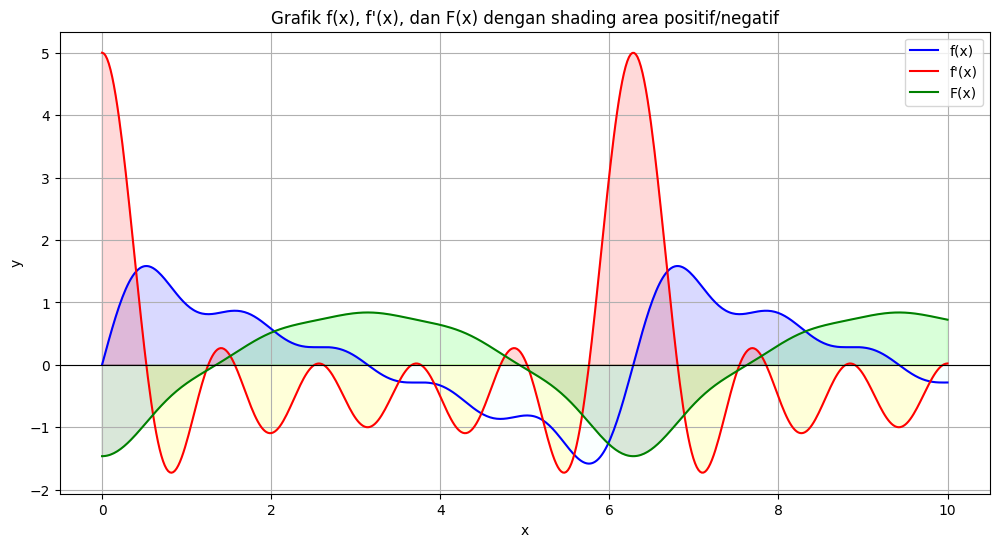

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi
def f(x):
    return np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

def fprime(x):
    return np.cos(x) + np.cos(2*x) + np.cos(3*x) + np.cos(4*x) + np.cos(5*x)

def F(x):
    return -np.cos(x) - (1/4)*np.cos(2*x) - (1/9)*np.cos(3*x) - (1/16)*np.cos(4*x) - (1/25)*np.cos(5*x)

# Domain
x = np.linspace(0, 10, 500)
y = f(x)
y_prime = fprime(x)
y_int = F(x)

plt.figure(figsize=(12,6))

# f(x)
plt.plot(x, y, color="blue", label="f(x)")
plt.fill_between(x, y, 0, where=(y>=0), color="blue", alpha=0.15)
plt.fill_between(x, y, 0, where=(y<0), color="lightcyan", alpha=0.15)

# f'(x)
plt.plot(x, y_prime, color="red", label="f'(x)")
plt.fill_between(x, y_prime, 0, where=(y_prime>=0), color="red", alpha=0.15)
plt.fill_between(x, y_prime, 0, where=(y_prime<0), color="yellow", alpha=0.15)

# F(x)
plt.plot(x, y_int, color="green", label="F(x)")
plt.fill_between(x, y_int, 0, where=(y_int>=0), color="lime", alpha=0.15)
plt.fill_between(x, y_int, 0, where=(y_int<0), color="darkgreen", alpha=0.15)

# Garis sumbu
plt.axhline(0, color="black", linewidth=0.8)

plt.title("Grafik f(x), f'(x), dan F(x) dengan shading area positif/negatif")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Gambar diatas adalah plot untuk hasil dari f(x),f'(x), dan F(x) atau bisa disebut hasil plot dari fungsi asli,fungsi turunan,dan integral. Shading warna transparant menunjukkan bagian positif (y lebih dari 0) dan bagian negatif (y kurang dari 0).
1. Garis biru mewakili fungsi asli (f(x)) dengan warna area positif blue dan area negatif lightcyan.
2. Garis merah mewakili turunan fungsi (f'(x)) dengan warna area positif merah dan area negatif yellow. Pola garis tersebut menunjukkan perubahan yang lebih tajam karena menggambarkan laju perubahan f(x).
3. Garis hijau mewakili turunan fungsi (F(x)) dengan warna area positif lime  dan area negatif darkgreen. Pola garis tersebut cenderung lebih halus karena merupakan akumulasi nilai dari f(x).

Secara keseluruhan, grafik ini menggambarkan keterkaitan antara fungsi, turunannya, dan integralnya, sekaligus menunjukkan area positif/negatif sebagai representasi kontribusi nilai fungsi terhadap integral. Dengan gambar ini juga dapat melihat area bawah kurva yang saling bertumpuk menunjukkan suatu nilai yang bisa tetap sama meskipun dalam turunan ,fungsi asli maupun integral.

